# Wavelet Analysis: Part One

## Background and Motivation

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq
from scipy.io import wavfile
import math
import pywt
plt.style.use('dark_background')

In [96]:
# Load .wav file data
sample_rate, signal_data = wavfile.read('jingle_bells.wav')

# Frequency determines the chord

duration = len(signal_data) / sample_rate
time = np.arange(0, duration, 1/sample_rate) 

print(f"Sample Rate: {sample_rate}")
print(f"duration = {duration} seconds (sample rate and audioBuffer = {len(signal_data)} / {sample_rate}")
print(f"len of audio file = {len(signal_data)}")
print(f"Total Length in time = {len(time)}")

Sample Rate: 10000
duration = 15.6991 seconds (sample rate and audioBuffer = 156991 / 10000
len of audio file = 156991
Total Length in time = 156991


In [97]:
# Plot .wav file
signal_df = pd.DataFrame({'time (seconds)': time, 'amplitude': signal_data})
signal_df.head()

,time (seconds),amplitude
0,0.0000,-417
1,0.0001,-2660
2,0.0002,-2491
3,0.0003,6441
4,0.0004,-8540


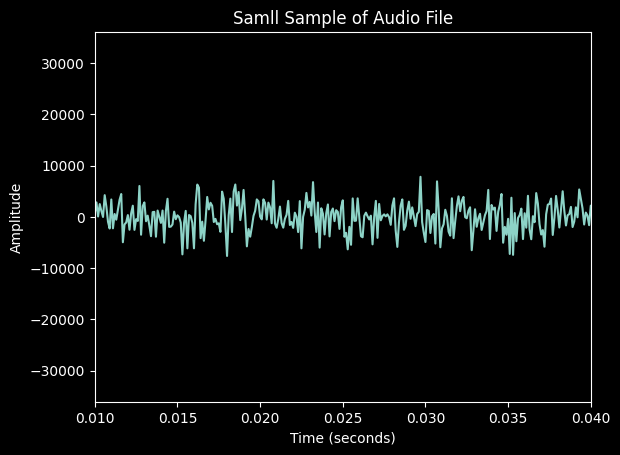

In [98]:
# Plot .wav file
fig, ax = plt.subplots()
fig = plt.plot(signal_df["time (seconds)"], signal_df["amplitude"])
plt.title("Samll Sample of Audio File")
ax.set_xlim(signal_df["time (seconds)"][100], signal_df["time (seconds)"][400])
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.savefig("jingle_bells_sample.png")
plt.show()

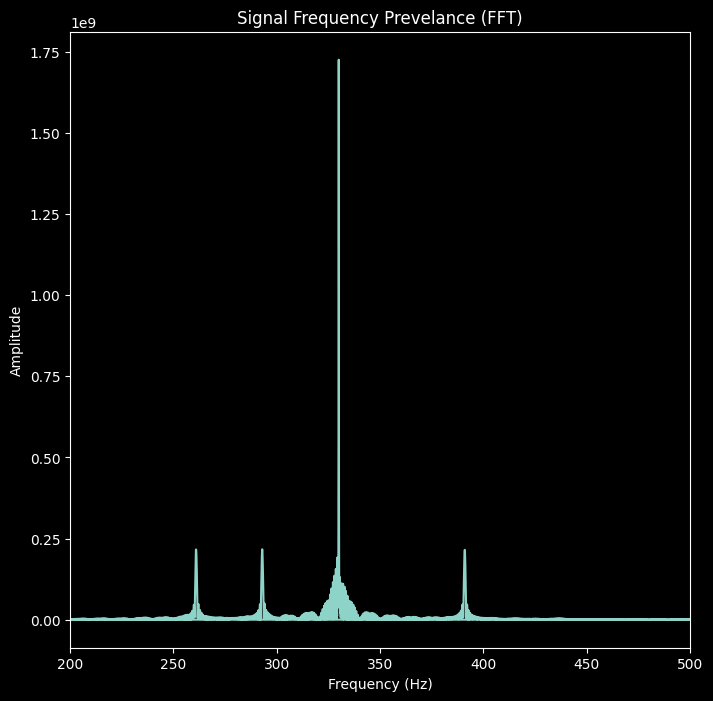

In [99]:
# Fast Fourier Transform

# Collect Fast Fourier Transform Data
fourier_transform = abs(fft(signal_data))
freqs = fftfreq(len(fourier_transform), (1/sample_rate))

# Plot Frequency Prevelance
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(freqs, fourier_transform)
# Only plot positive Frequencies (hz) in range of notes (200-600)
ax.set_xlim(left=200, right=500) 
plt.title("Signal Frequency Prevelance (FFT)")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.savefig("fft_1.png")
plt.show()

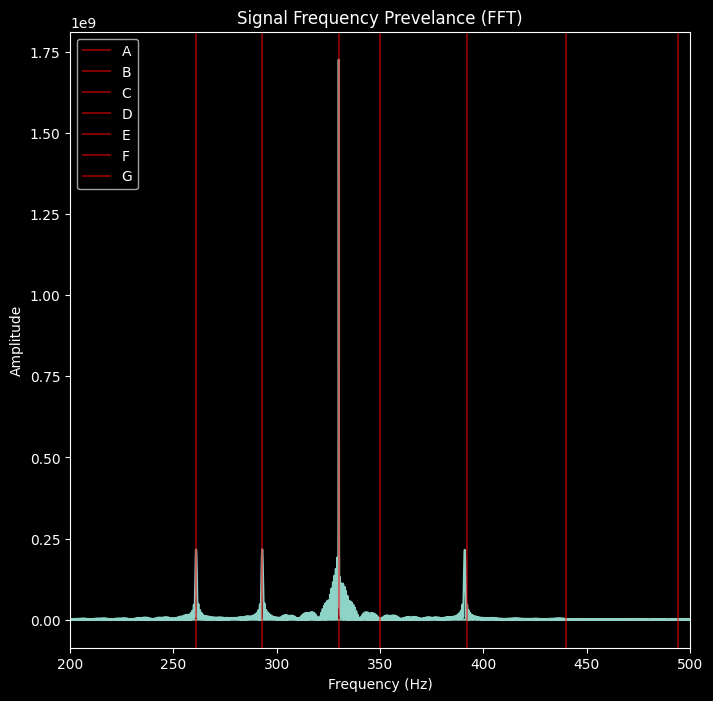

In [100]:
# Plot Frequency Prevelance with Note Overview
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(freqs, fourier_transform)
# Only plot positive Frequencies (hz) in range of notes (200-600)
ax.set_xlim(left=200, right=500) 
# A note: 440 hz
plt.axvline(x=440, color="red", label="A",alpha=0.5)
# B Note: 494 hz
plt.axvline(x=494, color="red", label="B",alpha=0.5)
# C Note: 261 hz
plt.axvline(x=261, color="red", label="C",alpha=0.5)
# D Note: 293 hz
plt.axvline(x=293, color="red", label="D",alpha=0.5)
# E Note: 330 hz
plt.axvline(x=330, color="red", label="E",alpha=0.5)
# F Note: 350 hz
plt.axvline(x=350, color="red", label="F",alpha=0.5)
# G Note: 392 hz
plt.axvline(x=392, color="red", label="G",alpha=0.5)
plt.title("Signal Frequency Prevelance (FFT)")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.savefig("fft_2.png")
plt.show()

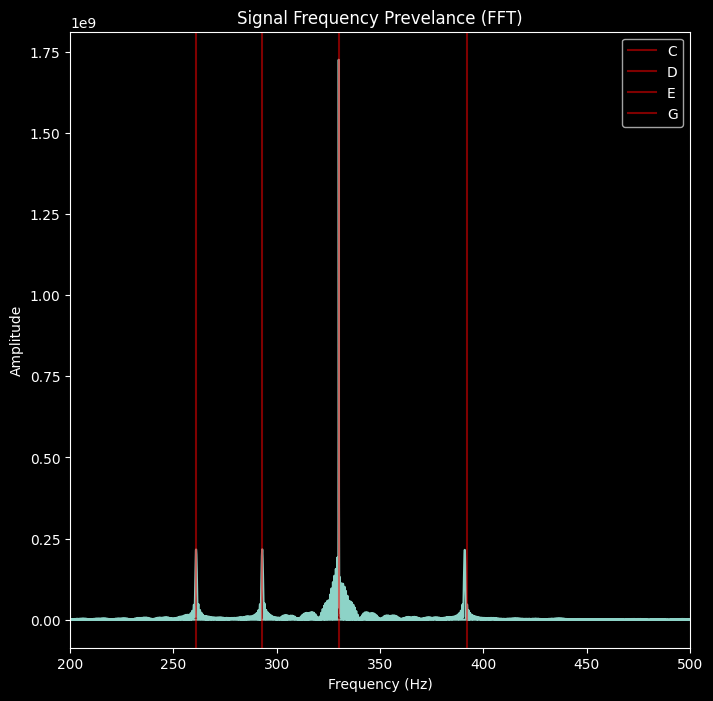

In [101]:
# Plot Frequency Prevelance with Note Overview
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(freqs, fourier_transform)
# Only plot positive Frequencies (hz) in range of notes (200-600)
ax.set_xlim(left=200, right=500) 
# C Note: 261 hz
plt.axvline(x=261, color="red", label="C",alpha=0.5)
# D Note: 293 hz
plt.axvline(x=293, color="red", label="D",alpha=0.5)
# E Note: 330 hz
plt.axvline(x=330, color="red", label="E",alpha=0.5)
# G Note: 392 hz
plt.axvline(x=392, color="red", label="G",alpha=0.5)
plt.title("Signal Frequency Prevelance (FFT)")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.savefig("fft_3.png")
plt.show()

## Wavelet

size (39, 156991) with 39 scales and 156991 time steps
x-axis be default is: 156991
y-axis be default is: 39


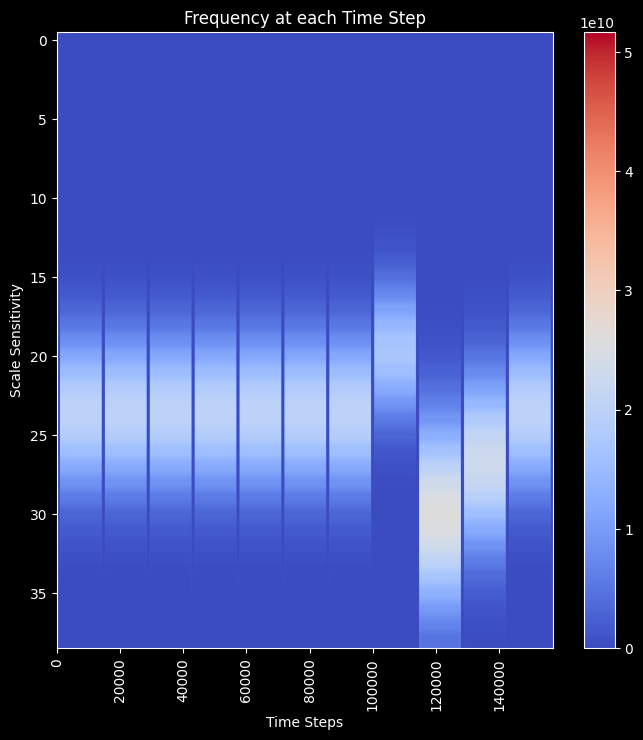

In [102]:
wavelet_mother = "morl" # morlet

# scale determinse how squished or stretched a wavelet is
scales = np.arange(1, 40)
wavelet_coeffs, freqs = pywt.cwt(signal_data, scales, wavelet = wavelet_mother)

# Shape of wavelet transform
print(f"size {wavelet_coeffs.shape} with {wavelet_coeffs.shape[0]} scales and {wavelet_coeffs.shape[1]} time steps")
print(f"x-axis be default is: {wavelet_coeffs.shape[1]}")
print(f"y-axis be default is: {wavelet_coeffs.shape[0]}")

# Plot scalogram
# compare the power spectrum (absolute value squared)
power = np.power((abs(wavelet_coeffs)), 2)

fig, ax = plt.subplots(figsize=(8, 8))
plt.title("Frequency at each Time Step")
plt.xlabel("Time Steps")
plt.ylabel("Scale Sensitivity")
plt.xticks(rotation=90)
plt.imshow(power, 
           vmax=(power).max(), vmin=(power).min(),
           cmap="coolwarm", aspect="auto")
plt.colorbar()
plt.savefig("jingle_bells_wavelet.png")
plt.show()

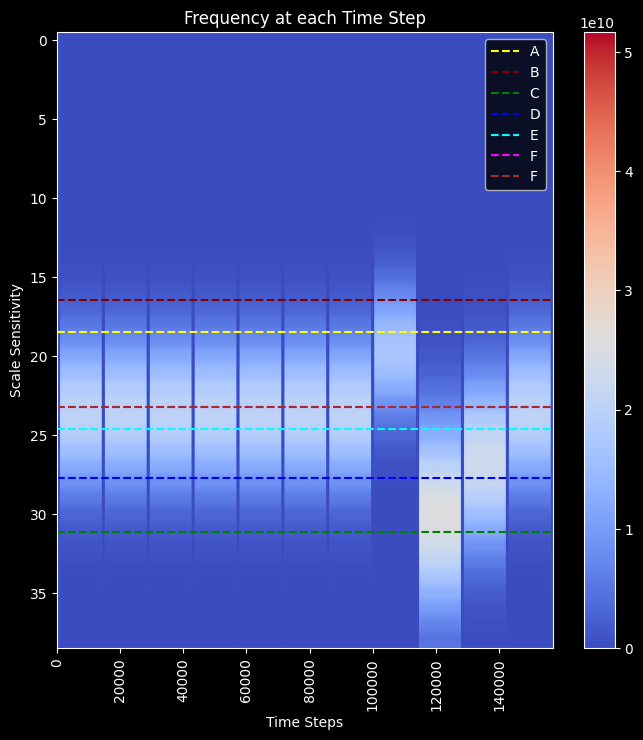

In [103]:
# note frequency in hz
fig, ax = plt.subplots(figsize=(8, 8))
a_freq = pywt.frequency2scale(wavelet_mother, 440*sample_rate)
plt.axhline(y=a_freq, color='yellow', linestyle='--', label='A')
b_freq = pywt.frequency2scale(wavelet_mother, 494*sample_rate)
plt.axhline(y=b_freq, color="maroon", linestyle='--', label='B')
c_freq = pywt.frequency2scale(wavelet_mother, 261*sample_rate)
plt.axhline(y=c_freq, color='green', linestyle='--', label='C')
d_freq = pywt.frequency2scale(wavelet_mother, 293*sample_rate)
plt.axhline(y=d_freq, color='blue', linestyle='--', label='D')
e_freq = pywt.frequency2scale(wavelet_mother, 330*sample_rate)
plt.axhline(y=e_freq, color='cyan', linestyle='--', label='E')
f_freq = pywt.frequency2scale(wavelet_mother, 350*sample_rate)
plt.axhline(y=f_freq, color='fuchsia', linestyle='--', label='F')
g_freq = pywt.frequency2scale(wavelet_mother, 392*sample_rate)
plt.axhline(y=f_freq, color='brown', linestyle='--', label='F')

# Plot scalogram
# compare the power spectrum (absolute value squared)
power = np.power((abs(wavelet_coeffs)), 2)

plt.title("Frequency at each Time Step")
plt.xlabel("Time Steps")
plt.ylabel("Scale Sensitivity")
plt.xticks(rotation=90)
plt.imshow(power, 
           vmax=(power).max(), vmin=(power).min(),
           cmap="coolwarm", aspect="auto")
plt.colorbar()
plt.legend()
plt.savefig("jingle_bells_wavelet_freq.png")
plt.show()

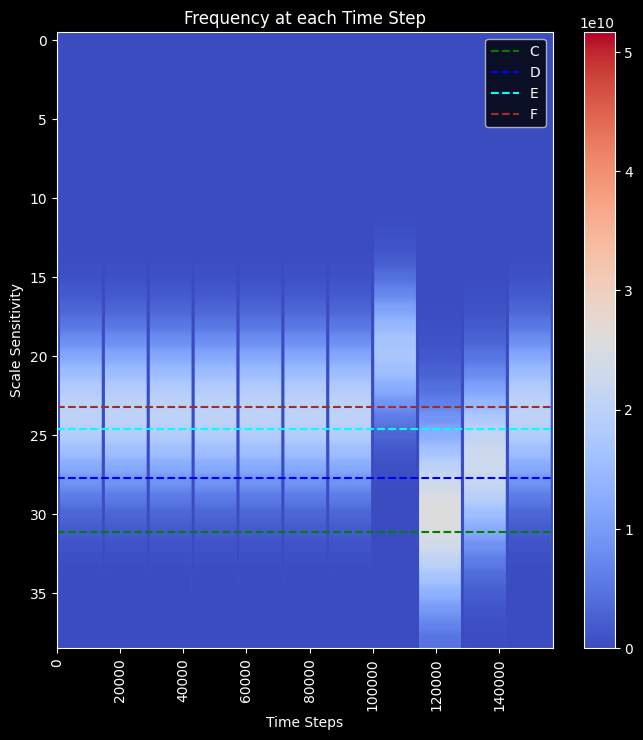

In [105]:
# note frequency in hz
fig, ax = plt.subplots(figsize=(8, 8))
c_freq = pywt.frequency2scale(wavelet_mother, 261*sample_rate)
plt.axhline(y=c_freq, color='green', linestyle='--', label='C')
d_freq = pywt.frequency2scale(wavelet_mother, 293*sample_rate)
plt.axhline(y=d_freq, color='blue', linestyle='--', label='D')
e_freq = pywt.frequency2scale(wavelet_mother, 330*sample_rate)
plt.axhline(y=e_freq, color='cyan', linestyle='--', label='E')
g_freq = pywt.frequency2scale(wavelet_mother, 392*sample_rate)
plt.axhline(y=f_freq, color='brown', linestyle='--', label='F')

# Plot scalogram
# compare the power spectrum (absolute value squared)
power = np.power((abs(wavelet_coeffs)), 2)

plt.title("Frequency at each Time Step")
plt.xlabel("Time Steps")
plt.ylabel("Scale Sensitivity")
plt.xticks(rotation=90)
plt.imshow(power, 
           vmax=(power).max(), vmin=(power).min(),
           cmap="coolwarm", aspect="auto")
plt.colorbar()
plt.legend()
plt.savefig("jingle_bells_wavelet_freq2.png")
plt.show()